In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
sns.set_style("whitegrid")

In [5]:
import kagglehub

# Download latest version
path = ("german_credit_data.csv")

print("Path to dataset files:", path)

Path to dataset files: german_credit_data.csv


In [6]:
df = pd.read_csv(path, index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [8]:
df["Sex"].value_counts()

Sex
male      690
female    310
Name: count, dtype: int64

In [9]:
df['Job'].value_counts()

Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64

In [10]:
df['Housing'].value_counts()

Housing
own     713
rent    179
free    108
Name: count, dtype: int64

In [11]:
df["Saving accounts"].describe()

count        817
unique         4
top       little
freq         603
Name: Saving accounts, dtype: object

In [12]:
df['Saving accounts'].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [13]:
df['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [14]:
df['Credit amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit amount, dtype: float64

In [15]:
df["Duration"].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration, dtype: float64

In [16]:
df["Purpose"].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

In [17]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

There is a class imbalance between good credit and bad credit.

In [18]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk,1000,2,good,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Saving & checking account have null values

In [20]:
df.duplicated().sum()

np.int64(0)

There are no duplicates

In [21]:
df = df.dropna().reset_index(drop=True)

In [22]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

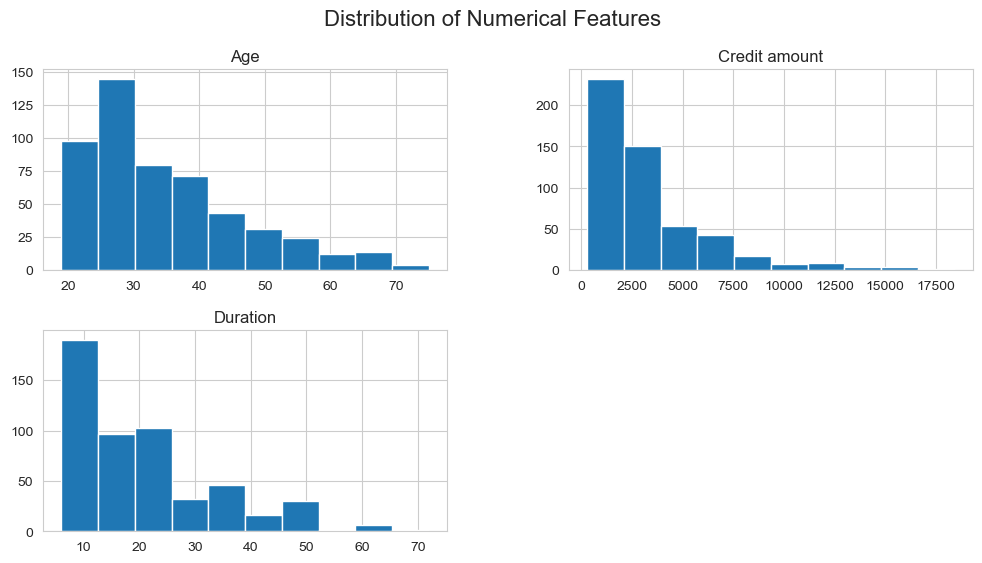

In [23]:
df[["Age", "Credit amount", "Duration"]].hist(bins=10, figsize=(12, 6))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

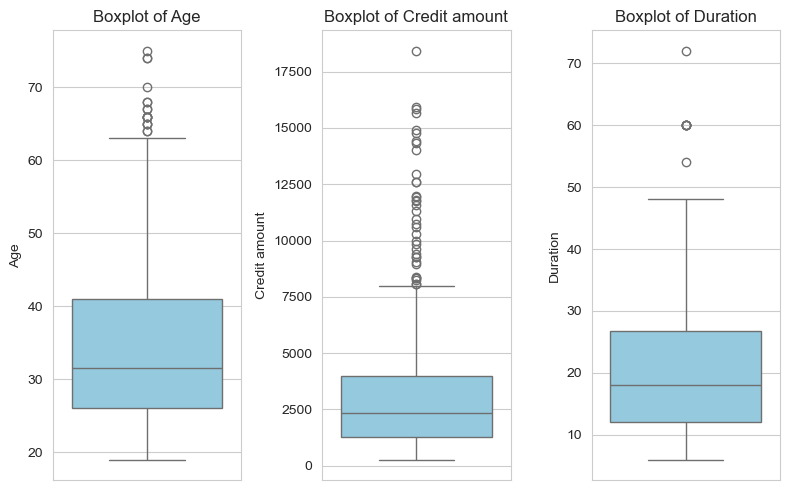

In [24]:
plt.figure(figsize=(8, 5))
for i , col in enumerate (["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [26]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [28]:
categorical_cols = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

C:\Users\Laiba\AppData\Local\Temp\ipykernel_18108\4056423297.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order = df[col].value_counts().index)
C:\Users\Laiba\AppData\Local\Temp\ipykernel_18108\4056423297.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order = df[col].value_counts().index)
C:\Users\Laiba\AppData\Local\Temp\ipykernel_18108\4056423297.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order = df[col].value_counts()

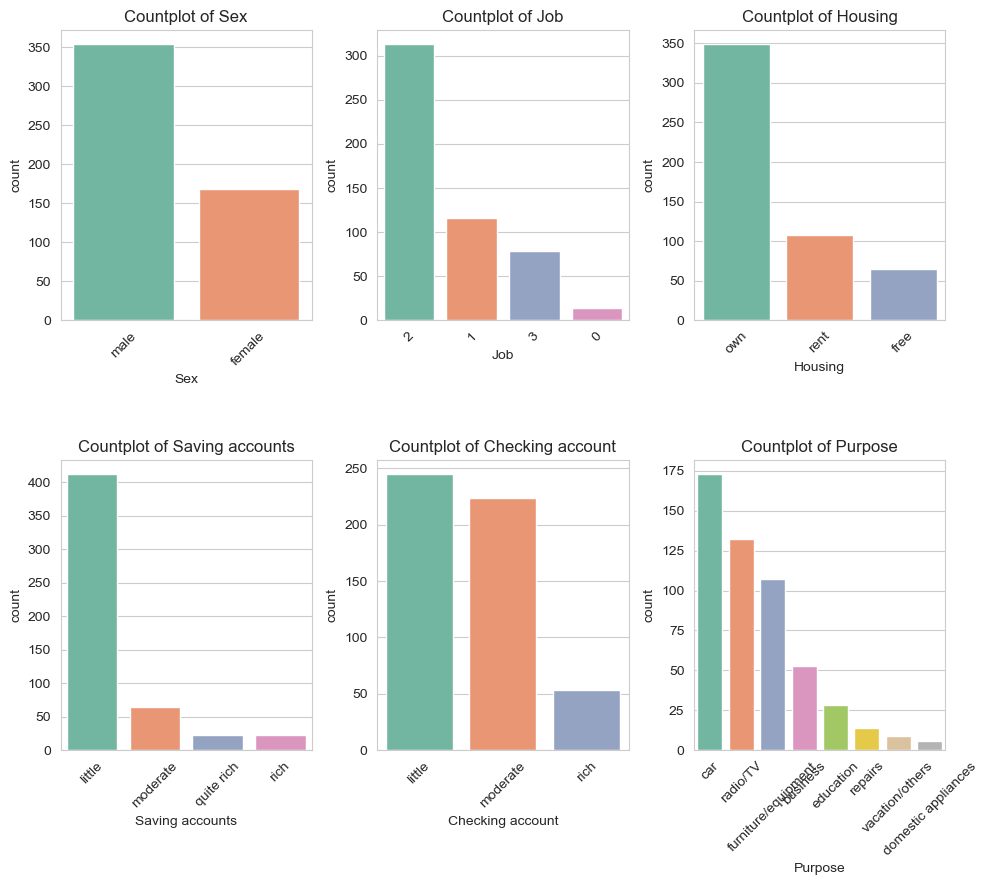

In [34]:
plt.figure(figsize=(10, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, palette="Set2", order = df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [36]:
corr = df[["Age", 'Job', "Credit amount", "Duration"]].corr()
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


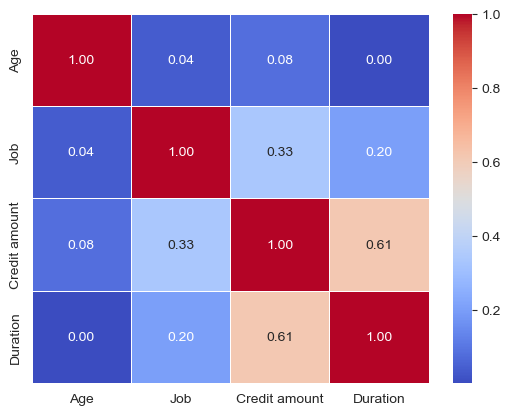

In [38]:
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.show()

In [42]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [43]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [44]:
pd.pivot_table(df, values="Credit amount", index = "Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


Text(0.5, 1.0, 'Credit Amount vs Age colored by Sex and size by duration')

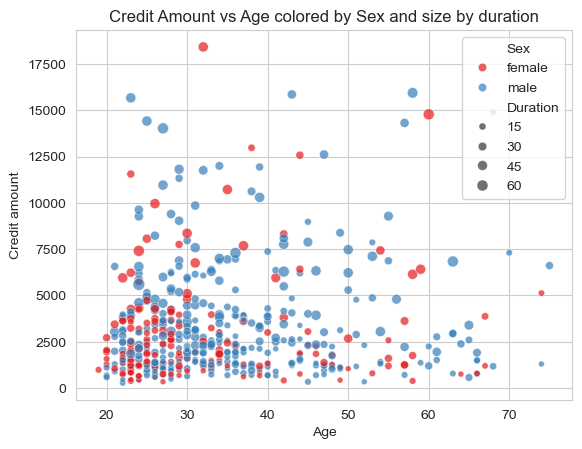

In [45]:
sns.scatterplot(data = df, x="Age", y="Credit amount", hue="Sex", size="Duration", alpha=0.7, palette="Set1")
plt.title("Credit Amount vs Age colored by Sex and size by duration")

C:\Users\Laiba\AppData\Local\Temp\ipykernel_18108\823362678.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x="Saving accounts", y = "Credit amount", palette="Set2")


Text(0.5, 1.0, 'Credit Amount distribution by Saving accounts')

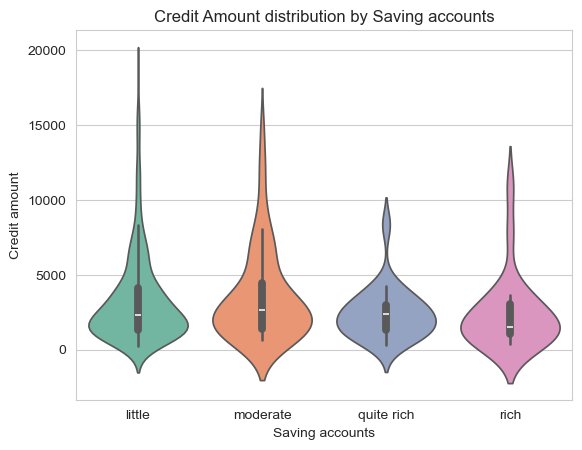

In [46]:
sns.violinplot(data = df, x="Saving accounts", y = "Credit amount", palette="Set2")
plt.title("Credit Amount distribution by Saving accounts")

In [47]:
df["Risk"].value_counts(normalize=True) * 100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

C:\Users\Laiba\AppData\Local\Temp\ipykernel_18108\4133253348.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x="Risk", y=col, palette="Set3")
C:\Users\Laiba\AppData\Local\Temp\ipykernel_18108\4133253348.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x="Risk", y=col, palette="Set3")
C:\Users\Laiba\AppData\Local\Temp\ipykernel_18108\4133253348.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x="Risk", y=col, palette="Set3")


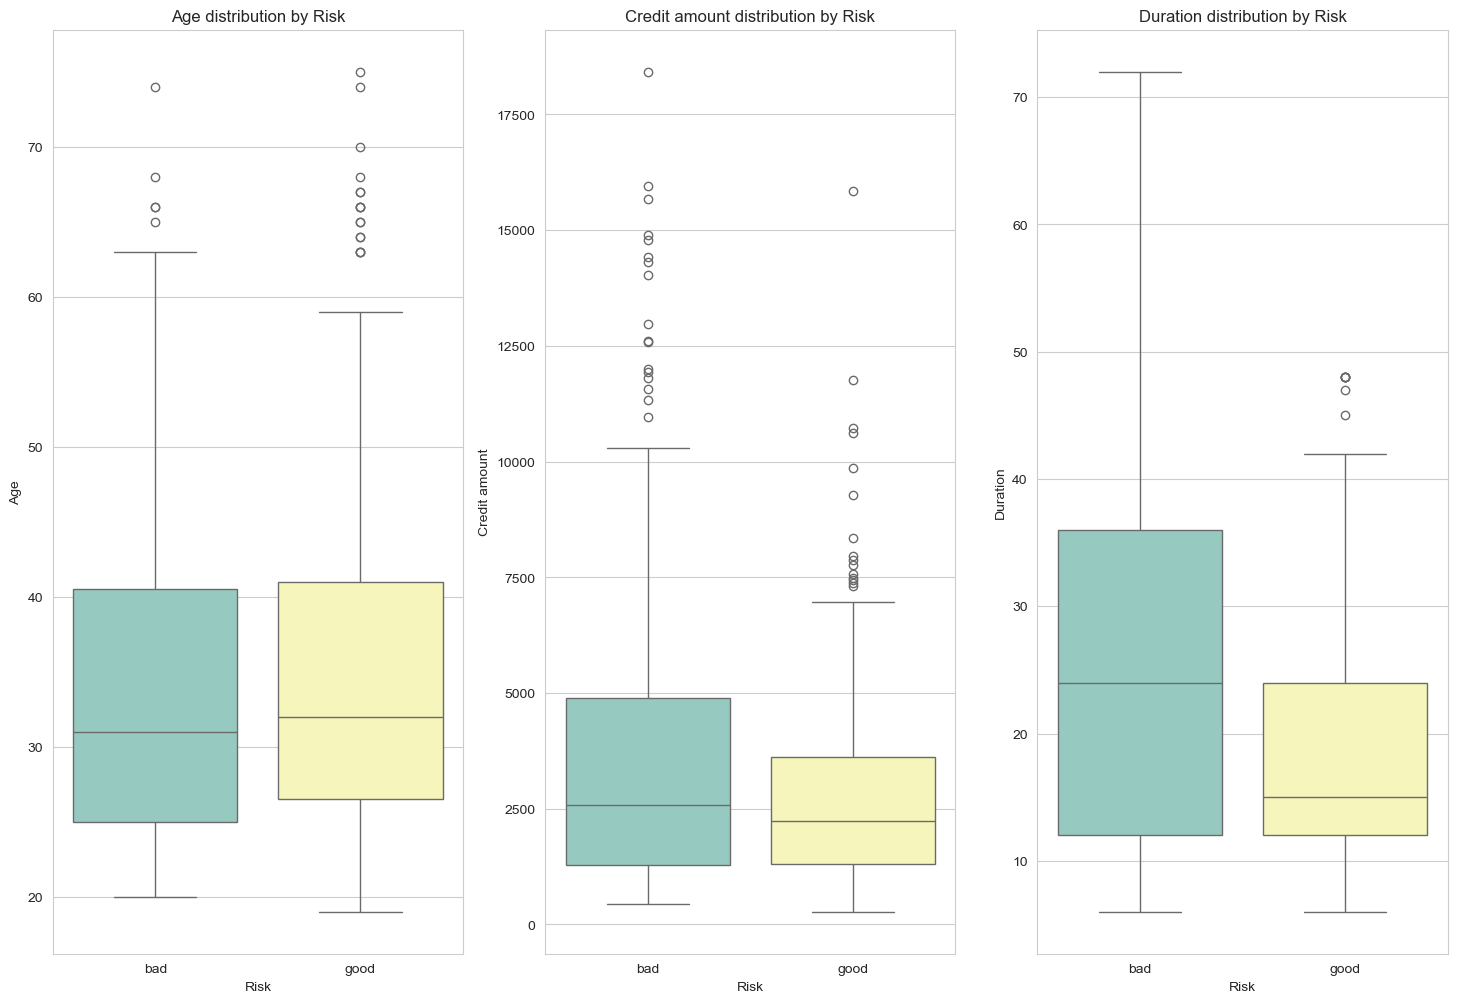

In [60]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(data = df, x="Risk", y=col, palette="Set3")
    plt.title(f"{col} distribution by Risk")

In [63]:
df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


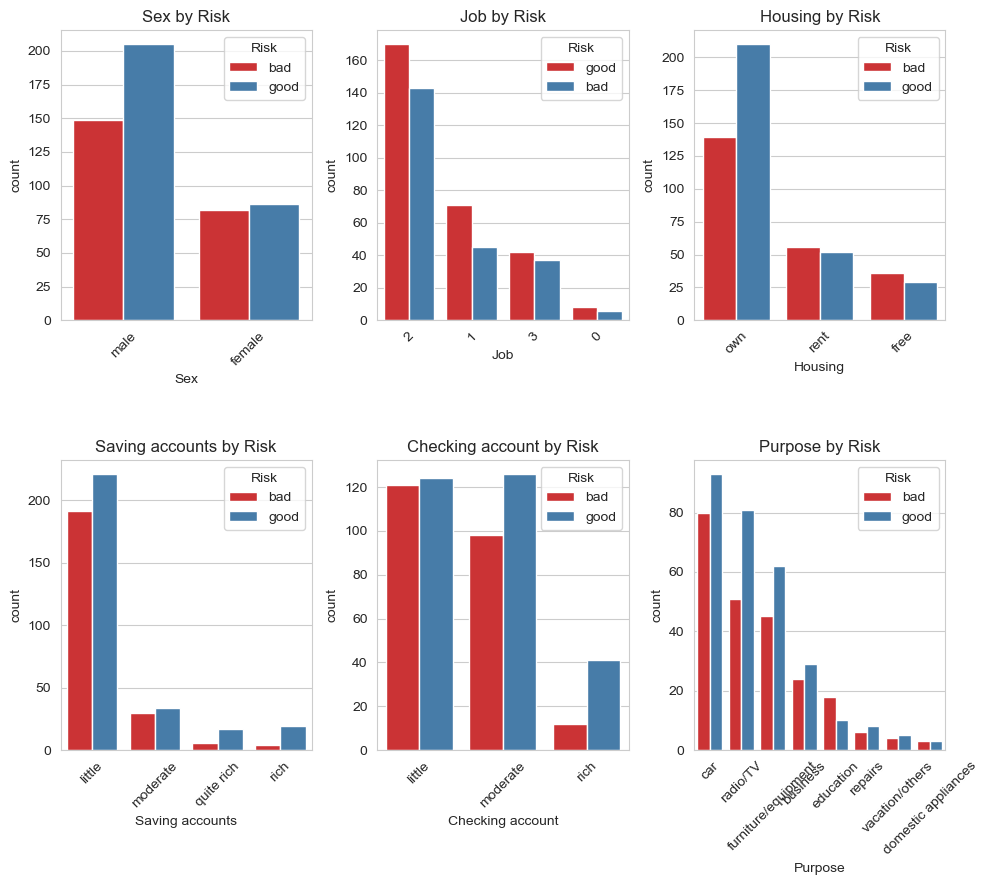

In [65]:
plt.figure(figsize=(10, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data = df, x = col, hue = "Risk", palette="Set1", order = df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()